
Running ml_xgb
precision_score:0.755939524838
f1_score:0.744680851064
                           price  w
date                               
2018-08-15 02:00:00  6313.941558  1
2018-08-15 02:05:00  6338.085089  1

Running ml_randfor
precision_score:0.752860411899
f1_score:0.719912472648
                           price  w
date                               
2018-08-15 02:00:00  6313.941558  1
2018-08-15 02:05:00  6338.085089  1

Running ml_stacking
task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    ----
    MEAN:     [0.68837929] + [0.00929126]
    FULL:     [0.68845748]

model  1:     [MLPClassifier]
    ----
    MEAN:     [0.71102240] + [0.00702343]
    FULL:     [0.71102844]

model  2:     [KNeighborsClassifier]
    ----
    MEAN:     [0.70429309] + [0.00797029]
    FULL:     [0.70434309]

precision_score:0.785547785548
f1_score:0.743929359823
                         

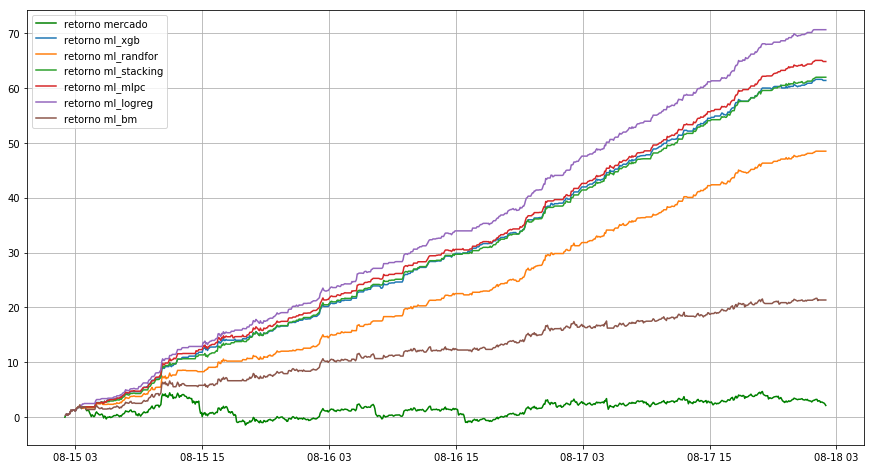

In [3]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"


start=string2ts("2018-08-15 02:00:00")
end=string2ts("2018-08-18 02:00:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.95
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
strategies = ["ml_xgb", "ml_randfor", "ml_stacking", "ml_mlpc", "ml_logreg", "ml_bm"]

list_profit = []
list_v = []
ws = []


for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per)
    relativeReturn,v = profit(w)
    
    ws.append(w)
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label='retorno '+strategy)

plt.legend(loc='best')
plt.grid()

In [2]:
ws[0][["w"]].tail()

,w
date,
2018-05-18 01:40:00,0.0
2018-05-18 01:45:00,0.0
2018-05-18 01:50:00,1.0
2018-05-18 01:55:00,0.0
2018-05-18 02:00:00,0.0
